> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (TMDB Movie Data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

Questions which I will be looking to answer from the given data set:

1. What were the most produced genres from year to year? 
2. Which film studios have generated the most revenue(adjusted)?
3. What kinds of properties are associated with movies that have high revenues?
4. Do we see a relationship between revenue vs movie ratings and budget(adjusted)?
5. How has annual revenue(adjusted) changed year on year? Is it trending upwards?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

<a id='wrangling'></a>
## Data Wrangling

In [3]:
df = pd.read_csv('tmdb-movies.csv')
df.shape #There are 10866 rows and 21 columns

(10866, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
df.head()
#'genre' and 'production_companies' columns contain multiple values separated by '|'


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning

#### We want to conduct some basic cleaning by removing duplicates and missing row values across the 'genres' and 'production_companies' column in order to assist us in eventually answering the following questions:

1. Which genres are most popular from year to year?
2. Which film studios have generated the most revenue(adjusted)?

There is one duplicated row, so the code below will drop that row. So we'll want to drop that

In [7]:
df.duplicated().value_counts()
df.drop_duplicates(inplace=True)

We appear to have missing values across production companies column and genres. Lets explore and clean further

In [8]:
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [9]:
df[df.genres.isnull()] #can't see any obvious trends

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
424,363869,tt4835298,0.244648,0,0,Belli di papÃ,Diego Abatantuono|Matilde Gioli|Andrea Pisani|...,NaN,Guido Chiesa,NaN,...,"Italian remake of the Mexican 2013 hit, ""We th...",100,NaN,NaN,10/29/15,21,6.1,2015,0.00000,0.0
620,361043,tt5022680,0.129696,0,0,All Hallows' Eve 2,NaN,NaN,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,NaN,...,A woman finds a VHS tape on her doorstep that ...,90,NaN,Ruthless Pictures|Hollywood Shorts,10/6/15,13,5.0,2015,0.00000,0.0
997,287663,NaN,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,NaN,Steward Lee|Steven G. Lee,NaN,...,"A Long Time Ago In A Galaxy Far, Far Awayâ€¦ A...",44,NaN,NaN,10/3/14,13,6.8,2014,0.00000,0.0
1712,21634,tt1073510,0.302095,0,0,Prayers for Bobby,Ryan Kelley|Sigourney Weaver|Henry Czerny|Dan ...,http://www.prayersforbobby.com/,Russell Mulcahy,"Before you echo ""amen"" in your home and place ...",...,"True story of Mary Griffith, gay rights crusad...",88,NaN,Daniel Sladek Entertainment,2/27/09,57,7.4,2009,0.00000,0.0
1897,40534,tt1229827,0.020701,0,0,Jonas Brothers: The Concert Experience,Nick Jonas|Joe Jonas|Kevin Jonas|John Lloyd Ta...,NaN,Bruce Hendricks,NaN,...,Secure your VIP pass to a once-in-a-lifetime e...,76,NaN,NaN,2/27/09,11,7.0,2009,0.00000,0.0
2370,127717,tt1525359,0.081892,0,0,Freshman Father,Britt Irvin|Merrilyn Gann|Barbara Tyson|Anthon...,NaN,Michael Scott,NaN,...,NaN,0,NaN,NaN,6/5/10,12,5.8,2010,0.00000,0.0
2376,315620,tt1672218,0.068411,0,0,Doctor Who: A Christmas Carol,Matt Smith|Karen Gillan|Arthur Darvill|Michael...,NaN,NaN,NaN,...,Amy Pond and Rory Williams are trapped on a cr...,62,NaN,NaN,12/25/10,11,7.7,2010,0.00000,0.0
2853,57892,tt0270053,0.130018,0,0,Vizontele,YÄ±lmaz ErdoÄŸan|Demet Akbag|Altan Erkekli|Cem...,NaN,YÄ±lmaz ErdoÄŸan,NaN,...,The story takes place in a small town (called ...,110,NaN,NaN,2/2/01,12,7.2,2001,0.00000,0.0
3279,54330,tt1720044,0.145331,0,0,ì•„ê¸°ì™€ ë‚˜,Jang Keun-suk|Song Ha-yoon|Kim Jeong-Nan,NaN,Kim Jin-Yeong,NaN,...,Joon-soo (Jang Geun -Seok) is a rebellious hig...,96,NaN,NaN,8/13/08,11,6.1,2008,0.00000,0.0
4547,123024,tt2305700,0.520520,0,0,London 2012 Olympic Opening Ceremony: Isles of...,Queen Elizabeth II|Mike Oldfield|Kenneth Brana...,http://www.london2012.com/,Danny Boyle,Inspire a generation.,...,The London 2012 Olympic Games Opening Ceremony...,220,NaN,BBC,7/27/12,12,8.3,2012,0.00000,0.0


Let's drop rows which contain missing values within the genre column and assign to new dataframe 'df_genre'

In [10]:
df_genre = df.dropna(subset=['genres'])

Now let's look at missing values within the 'production_companies' column. 

There are no obvious trends for rows where there is a missing value within the column 'production_companies' and most of the movies generated little to no revenue

In [11]:
df[df.production_companies.isnull()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
228,300792,tt1618448,0.584363,0,0,Racing Extinction,Elon Musk|Jane Goodall|Louie Psihoyos|Leilani ...,http://www.racingextinction.com,Louie Psihoyos,It's better to light one candle than curse the...,...,An unlikely team of activists and innovators h...,90,Adventure|Documentary,NaN,1/24/15,36,7.8,2015,0.000000e+00,0.000000e+00
259,360603,tt5133572,0.476341,0,0,Crown for Christmas,Danica McKellar|Rupert Penry-Jones|Ellie Botte...,NaN,Alex Zamm,NaN,...,After getting fired from her job as a maid at ...,84,TV Movie,NaN,11/27/15,10,7.6,2015,0.000000e+00,0.000000e+00
295,363483,tt5133810,0.417191,0,0,12 Gifts of Christmas,Katrina Law|Donna Mills|Aaron O'Connell|Melani...,NaN,Peter Sullivan,NaN,...,"When Anna Parisi, an unemployed fine arts pain...",84,Family|TV Movie,NaN,11/26/15,12,6.3,2015,0.000000e+00,0.000000e+00
298,354220,tt3826866,0.370258,0,0,The Girl in the Photographs,Kal Penn|Claudia Lee|Kenny Wormald|Toby Heming...,NaN,Nick Simon,NaN,...,Images coming from the crimes committed by a d...,95,Crime|Horror|Thriller,NaN,9/14/15,10,4.7,2015,0.000000e+00,0.000000e+00
328,308457,tt3090670,0.367617,0,0,Advantageous,Jacqueline Kim|James Urbaniak|Freya Adams|Ken ...,NaN,Jennifer Phang,NaN,...,In a near-future city where soaring opulence o...,92,Science Fiction|Drama|Family,NaN,6/23/15,29,6.4,2015,0.000000e+00,0.000000e+00
370,318279,tt2545428,0.314199,0,2334228,Meru,Conrad Anker|Grace Chin|Jimmy Chin|Amee Hinkley,http://www.merufilm.com/,Jimmy Chin|Elizabeth Chai Vasarhelyi,NaN,...,Meru is the electrifying story of three elite ...,89,Adventure|Documentary,NaN,1/25/15,42,6.9,2015,0.000000e+00,2.147489e+06
374,206197,tt1015471,0.302474,0,0,The Sisterhood of Night,Kara Hayward|Georgie Henley|Olivia DeJonge|Lau...,http://www.thesisterhoodofnight-movie.com/,Caryn Waechter,The Salem Witch Trials remixed.,...,When a teenage girl says she's the victim of a...,104,Mystery|Drama|Thriller,NaN,4/10/15,25,6.6,2015,0.000000e+00,0.000000e+00
382,306197,tt4145304,0.295946,0,0,Unexpected,Cobie Smulders|Gail Bean|Anders Holm|Elizabeth...,NaN,Kris Swanberg,No one is ever really prepared.,...,An inner-city high school teacher discovers sh...,90,Drama|Comedy,NaN,7/24/15,22,5.7,2015,0.000000e+00,0.000000e+00
388,323967,tt2016335,0.289526,700000,0,Walter,Andrew J. West|Justin Kirk|Virginia Madsen|Wil...,NaN,Anna Mastro,Heaven or hell. It's in his hands.,...,A ticket-taker at the local cinema believes he...,87,Drama|Comedy,NaN,3/13/15,12,5.2,2015,6.439997e+05,0.000000e+00
393,343284,tt3602128,0.283194,2000000,0,Night Of The Living Deb,Maria Thayer|Chris Marquette|Ray Wise|Michael ...,NaN,Kyle Rankin,NaN,...,After a one night stand Deb wakes up in the mi...,85,Comedy|Horror,NaN,8/29/15,13,5.7,2015,1.839999e+06,0.000000e+00


Let's drop rows which contain missing values within the 'production_companies' column and assign to new dataframe 'df_production'

In [12]:
df_production = df.dropna(subset=['production_companies'])

<a id='eda'></a>
## Exploratory Data Analysis

Let's dive in and try and answer the following question:

### Research Question 1 (Which were the most produced from year to year?)

Let's generate a new dataframe with the count of genres by release year

In [13]:
df_genre_year = df_genre.groupby(['release_year', 'genres'])['id'].count().reset_index() #I used id to count on
df_genre_year.rename(columns = {'id': 'count_of_genre'}, inplace=True) #rename id column to 'count_of_genre'
df_genre_year.head()

,release_year,genres,count_of_genre
0,1960,Action|Adventure|Drama|History|Western,1
1,1960,Action|Adventure|Western,1
2,1960,Action|Drama|Foreign|History|War,1
3,1960,Action|Drama|History,1
4,1960,Action|Drama|History|War,1


Below code provides us with the genres which had the max counts by year

In [14]:
df_genre_year_popular = df_genre_year.iloc[df_genre_year.groupby('release_year')['count_of_genre'].agg(pd.Series.idxmax)]
df_genre_year_popular

,release_year,genres,count_of_genre
19,1960,Horror,3
37,1961,Drama,3
64,1962,Drama,4
101,1963,Horror,3
121,1964,Comedy|Romance,5
146,1965,Action|Adventure|Drama|Western,2
186,1966,Action|Western,3
228,1967,Comedy|Drama|Romance,4
263,1968,Drama,4
297,1969,Drama,5


Drama and comedy appear quite often as the leading type of genre produced by year. Let's try and visualise this via a pie chart.

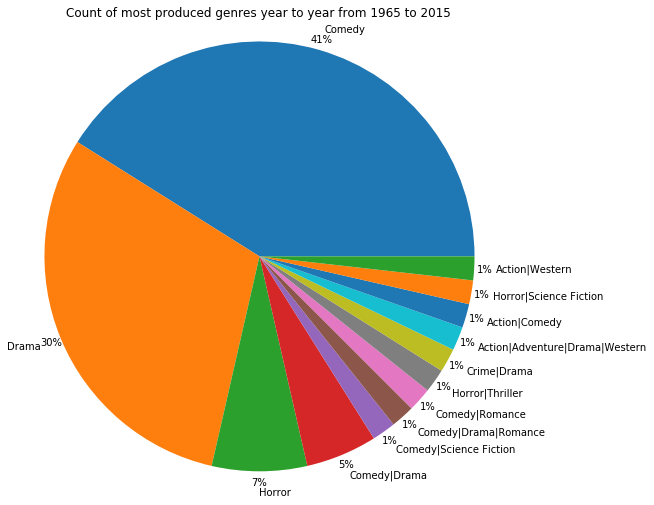

In [15]:
plt.figure(figsize = (7,7))
plt.pie(df_genre_year_popular.genres.value_counts(), labels = df_genre_year_popular.genres.value_counts().index, autopct = '%d%%', pctdistance = 1.05, labeldistance = 1.1);
plt.axis('equal');
plt.title('Count of most produced genres year to year from 1965 to 2015')
plt.tight_layout()

Concnclusions: Comedy and drama ranked as the most produced genre year to year more than 70% of the time during the timeframe (1960 - 2015)

### Research Question 2  (Which film studios have generated the most revenue adjusted?)

Let's start by doing a groupby on 'production_companies' and 'revenue_adj'

In [16]:
df_production_revenue = df_production.groupby('production_companies').revenue_adj.sum().reset_index().sort_values(by = 'revenue_adj', ascending = False)
df_production_revenue.head(30)

,production_companies,revenue_adj
4531,Paramount Pictures,1.459735e+10
7071,Walt Disney Pictures|Pixar Animation Studios,8.301807e+09
6533,Universal Pictures,7.726067e+09
1205,Columbia Pictures,6.653585e+09
1829,DreamWorks Animation,6.633003e+09
3702,Marvel Studios,5.762231e+09
3576,Lucasfilm|Twentieth Century Fox Film Corporation,5.468157e+09
2064,Eon Productions,5.038386e+09
7025,Walt Disney Pictures,5.036571e+09
7132,Warner Bros.,4.920632e+09


Disney shows up quite a lot and is named in different ways. The same is the case for paramount, universal pictures and columbia pictures. 

Let's use regex to do a bit of data cleaning. We want to see how much revenue was generated for production comapnies which contain the strings:

1. Disney
2. Paramount
3. Universal
4. Columbia

In [17]:
disney = df_production_revenue[df_production_revenue['production_companies'].str.contains('Disney') == True]
paramount = df_production_revenue[df_production_revenue['production_companies'].str.contains('Paramount') == True]
universal = df_production_revenue[df_production_revenue['production_companies'].str.contains('Universal') == True]
columbia = df_production_revenue[df_production_revenue['production_companies'].str.contains('Columbia') == True]

In [18]:
disney.shape #133 rows
paramount.shape #268 rows
universal.shape #376 rows
columbia.shape #315 rows

(315, 2)

There appear to be quite a few rows that contain Disney, Paramount, Universal and Columbia. 

Lets see if there any duplicates between the 4 data frames. We'll start by adding a new column 'renamed_production' to each of these dataframes with renamed production company title:

In [19]:
disney['renamed_production'] = np.repeat('disney', 133)
paramount['renamed_production'] = np.repeat('paramount', 268)
universal['renamed_production'] = np.repeat('universal', 376)
columbia['renamed_production'] = np.repeat('columbia', 315)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

Now we will look to append the dataframes together before checking for duplicates within the 'production_companies' column

In [20]:
top_4_prod = pd.concat([disney, paramount, universal, columbia])
top_4_prod.production_companies.duplicated().value_counts()

False    1069
True       23
Name: production_companies, dtype: int64

Only 23 duplicated rows, we can ignore as it constitutes a small % of overall rows. Let's do a groupby and visualise via a bar chart the revenue_adj for the top 4 production companies

In [21]:
top_4_groupby = top_4_prod.groupby('renamed_production').revenue_adj.sum().reset_index()
top_4_groupby

,renamed_production,revenue_adj
0,columbia,5.181868e+10
1,disney,4.551672e+10
2,paramount,5.838407e+10
3,universal,6.781617e+10


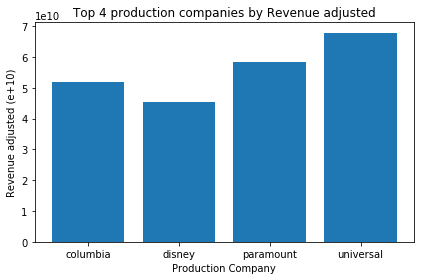

In [22]:
plt.bar(top_4_groupby.renamed_production, top_4_groupby.revenue_adj);
plt.title('Top 4 production companies by Revenue adjusted')
plt.xlabel('Production Company')
plt.ylabel('Revenue adjusted (e+10)')
plt.tight_layout() #Prevents subplots labels from overlapping

Conclusion:

It looks like 'Universal' was the leading film studio in revenue adjusted over the date period (1965 - 2015) versus competitors; Disney, Paramount & Columbia

### Research Question 3 (What kinds of properties are associated with movies that have high revenues?)

Let's split the data frame into two where we compare movies which fall into the top 10% percentile in terms of revenue generated vs the bottom 90.

In [23]:
top_10 = df[df.revenue_adj >= np.percentile(df.revenue_adj, 90)].reset_index() #top10%
bottom_90 = df[df.revenue_adj < np.percentile(df.revenue_adj, 90)].reset_index() #bottom 90%

Lets check that this was split correctly. The rows in top_10 and bottom_90 should match with the rows in df

In [24]:
df.shape[0] == top_10.shape[0] + bottom_90.shape[0] #Matches as the boolean returns True

True

Let's look into the two dataframes and see if there is anything at a highlevel which we can see when applying a describe() method.

In [25]:
#fig_top10 = top_10.hist(figsize = (8, 10));
#fig_bottom90 = bottom_90.hist(figsize = (8, 10));
top_10.describe()

,index,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,1087.000000,1087.000000,1087.000000,1.087000e+03,1.087000e+03,1087.000000,1087.000000,1087.000000,1087.000000,1.087000e+03,1.087000e+03
mean,5762.598896,28599.331187,2.115225,6.940527e+07,2.907635e+08,117.185833,1192.772769,6.427323,1999.203312,8.112846e+07,3.772437e+08
std,3130.578972,54555.322515,2.245541,5.794640e+07,2.467679e+08,28.580835,1314.321454,0.709913,12.689886,5.707046e+07,2.871842e+08
min,0.000000,11.000000,0.044675,0.000000e+00,2.500000e+07,69.000000,10.000000,4.200000,1960.000000,0.000000e+00,1.485140e+08
25%,2916.500000,1366.500000,0.982229,2.450000e+07,1.518344e+08,100.000000,308.500000,5.900000,1993.000000,3.686073e+07,1.964580e+08
50%,5588.000000,9208.000000,1.554808,5.700000e+07,2.139288e+08,114.000000,717.000000,6.400000,2002.000000,7.270485e+07,2.766965e+08
75%,8485.500000,20594.000000,2.522042,1.000000e+08,3.499362e+08,129.000000,1604.500000,6.900000,2009.000000,1.145284e+08,4.465368e+08
max,10822.000000,417859.000000,32.985763,3.800000e+08,2.781506e+09,705.000000,9767.000000,8.300000,2015.000000,3.683713e+08,2.827124e+09


In [26]:
bottom_90.describe()

,index,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,9778.000000,9778.000000,9778.000000,9.778000e+03,9.778000e+03,9778.000000,9778.000000,9778.000000,9778.000000,9.778000e+03,9.778000e+03
mean,5396.145429,70231.507977,0.483164,8.534398e+06,1.193079e+07,100.391593,108.969421,5.924729,2001.557374,1.048200e+07,1.514219e+07
std,3135.585212,94490.420819,0.533929,1.783925e+07,2.588381e+07,31.231653,242.486765,0.943638,12.805914,2.113552e+07,3.108004e+07
min,12.000000,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,2680.250000,11411.250000,0.193850,0.000000e+00,0.000000e+00,90.000000,16.000000,5.300000,1995.000000,0.000000e+00,0.000000e+00
50%,5391.000000,23215.000000,0.344273,0.000000e+00,0.000000e+00,97.000000,31.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,8089.500000,82545.000000,0.589382,1.000000e+07,9.287824e+06,109.000000,91.000000,6.600000,2011.000000,1.218971e+07,1.261434e+07
max,10865.000000,414419.000000,11.422751,4.250000e+08,1.606022e+08,900.000000,5923.000000,9.200000,2015.000000,4.250000e+08,1.482506e+08


It looks like movies that have high revenues display the following characteristics:

1. Larger budget_adj on average
2. Longer runtime
3. Higher vote average
4. Higher popularity score on average

Let's draw up some histogram visualisations and look at 'Top 10' vs 'Bottom 90' side by side

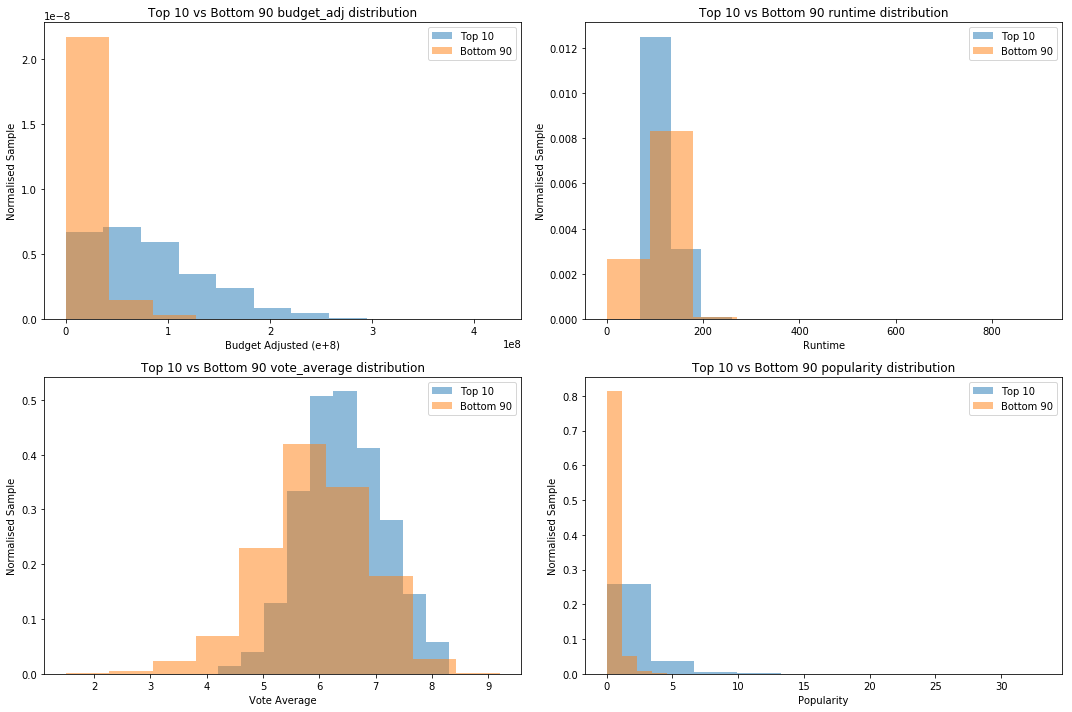

In [27]:
plt.figure(figsize = (15, 10))

#Create first histogram subplot of top 10 vs bottom 90 'budget_adj' distribution 
ax = plt.subplot(2, 2, 1)
ax.hist(top_10['budget_adj'], normed = True, alpha = 0.5, label = 'Top 10');
ax.hist(bottom_90['budget_adj'], normed = True, alpha = 0.5 , label = 'Bottom 90');
ax.set_title('Top 10 vs Bottom 90 budget_adj distribution');
ax.set_xlabel('Budget Adjusted (e+8)')
ax.set_ylabel('Normalised Sample')
ax.legend();

#Create second histogram subplot of top 10 vs bottom 90 'runtime' distribution 
ax2 = plt.subplot(2, 2, 2)
ax2.hist(top_10['runtime'], normed = True, alpha = 0.5, label = 'Top 10');
ax2.hist(bottom_90['runtime'], normed = True, alpha = 0.5 , label = 'Bottom 90');
ax2.set_title('Top 10 vs Bottom 90 runtime distribution');
ax2.set_xlabel('Runtime')
ax2.set_ylabel('Normalised Sample')
ax2.legend()

#Create third histogram subplot of top 10 vs bottom 90 'vote average' distribution 
ax3 = plt.subplot(2, 2, 3)
ax3.hist(top_10['vote_average'], normed = True, alpha = 0.5, label = 'Top 10');
ax3.hist(bottom_90['vote_average'], normed = True, alpha = 0.5 , label = 'Bottom 90');
ax3.set_title('Top 10 vs Bottom 90 vote_average distribution');
ax3.set_xlabel('Vote Average')
ax3.set_ylabel('Normalised Sample')
ax3.legend()

#Create third histogram subplot of top 10 vs bottom 90 'popularity' distribution 
ax4 = plt.subplot(2, 2, 4)
ax4.hist(top_10['popularity'], normed = True, alpha = 0.5, label = 'Top 10');
ax4.hist(bottom_90['popularity'], normed = True, alpha = 0.5 , label = 'Bottom 90');
ax4.set_title('Top 10 vs Bottom 90 popularity distribution');
ax4.set_xlabel('Popularity')
ax4.set_ylabel('Normalised Sample')
ax4.legend()

plt.tight_layout() #Prevents subplots labels from overlapping

Conclusions, from looking at the distrubitons we can see that:

1. High grosing movies were often to more likely have a higher budget.
2. High grossing movies often had a runtime between 100 to 200 minutes.
3. High grossing were more likely to have a higher vote average.
4. High grossing movies typically had higher popularity scores. 

### Research Question 4 (Do we see a relationship between Revenue adjusted vs Vote Average and Revenue adjusted vs Budget adjusted?)

We can do a scatter plot on the original dataframe to see if there is some linear relationship

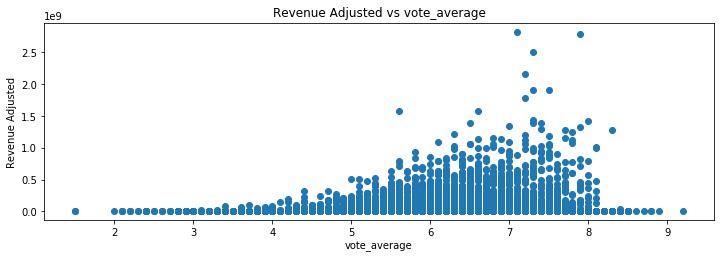

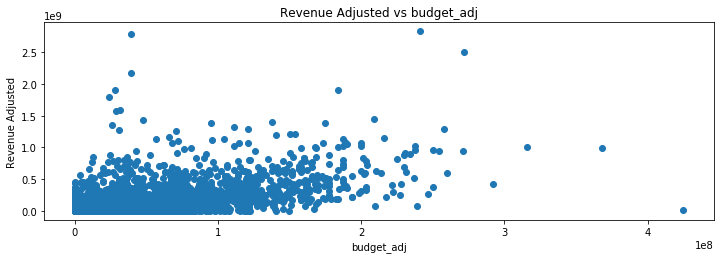

In [72]:
def corellation(index):
    for item in index.items():
        plt.figure(figsize = (12, 8))
        ax = plt.subplot(2, 1, item[1]);
        ax.scatter(df[item[0]], df['revenue_adj']);
        ax.set_title('Revenue Adjusted vs {item}'.format(item = item[0]));
        ax.set_xlabel(item[0]);
        ax.set_ylabel('Revenue Adjusted');
        plt.show()

Values = {'vote_average': 1, 'budget_adj': 2}
corellation(Values)

From looking at the two visuals above:

1. There appears to be a positive correlation between vote average and revenue adjusted
2. There appears to be a positive correlation between budget adjusted and revenue adjusted

### Research Question 4 (How has annual revenue adjusted changed year on year? Is it trending upwards?)


We can also do a simple scatter graph like the above to see if there is a positive relationship between revenue adjusted and year.

First we need to run a groupby and obtain total revenue adjusted by year

In [29]:
revenue_groupby = df.groupby('release_year').revenue_adj.sum().reset_index()
revenue_groupby.head()

,release_year,revenue_adj
0,1960,1.069117e+09
1,1961,2.463622e+09
2,1962,1.553996e+09
3,1963,1.334357e+09
4,1964,2.397193e+09


Now we build out the scatter graph on revenue_groupby dataframe

Text(0,0.5,'Revenue Adjusted')

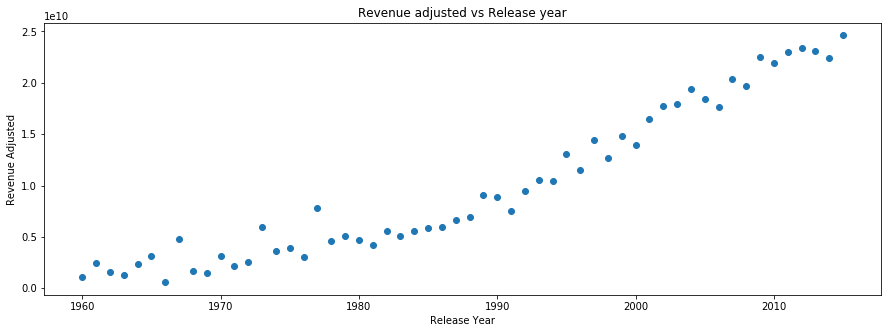

In [30]:
plt.figure(figsize = (15, 5))
plt.scatter(revenue_groupby['release_year'], revenue_groupby['revenue_adj'])
plt.title('Revenue adjusted vs Release year')
plt.xlabel('Release Year')
plt.ylabel('Revenue Adjusted')

Conclusion:

There is a clear trend which shows that more revenue (adjusted) has been growing year on year within the movie industry.

<a id='conclusions'></a>
## Overall Conclusions:

**1. What were the most produced genres from year to year?** 

   Comedy and drama ranked as the most produced genre, year to year more than 70% of the time during the    timeframe (1960 - 2015).


**2. Which film studios have generated the most revenue(adjusted)?**

   Universal was the leading film studio in revenue adjusted over the date period (1965 - 2015) versus competitors; Disney, Paramount & Columbia.


**3. What kinds of properties are associated with movies that have high revenues?**

   High grosing movies were often to more likely have a higher budget.
   High grossing movies often had a runtime between 100 to 200 minutes.
   High grossing were more likely to have a higher vote average.
   High grossing movies typically had higher popularity scores. 


**4. Do we see a relationship between revenue vs movie ratings and budget(adjusted)?**

   There appears to be a positive correlation between vote average and revenue adjusted.
   There appears to be a positive correlation between budget adjusted and revenue adjusted.


**5. How has annual revenue(adjusted) changed year on year? Is it trending upwards?**

There is a clear trend which shows that revenue (adjusted) has been growing year on year within the movie industry.

## Limitations:
**1.** There were quite a few movies that fell into multiple genres. That being said comedy and drama still ranked as the most 'STANDALONE' produced genre, year to year more than 70% of the time during the timeframe (1960 - 2015)

**2.** The data was quite unclean due to film studios being named differently depending on the movie produced as well as some production companies partnering up in joint ventures with other production comapanies. That being said it was clear who the 4 leading film studios when analysing the dataset. When looking into the movies produced amongst the 4 leading film studios; out of 1092 movies produced, 23 were joint vetures between them (~2%).

**3** When comparing the top 10% of movies vs bottom 90%. The sample size was bigger for the bottom 90% at 9,778 vs 1,087 for 10%. As a result we normalised the data when visualising via a histogram in order to make a fairer comparison.

**5** We haven't factored in the fact that revenue increasing year on year, could be due to number of movies produced. May want to look into revenue per movie average by year.

In [75]:
print(23+1069)
print(23/1092)

1092
0.021062271062271064


In [31]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0